<a href="https://colab.research.google.com/github/pallavi-sriv/week2-io-group-project/blob/main/week2_io_%22group%22_project_flower_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install --upgrade --force-reinstall --no-deps kaggle

     |████████████████████████████████| 61kB 5.0MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.10-cp37-none-any.whl size=73269 sha256=e865083e080bf1dd8e9f0811d802d8a00ce66edf5f304ab559481bdb772251ca
  Stored in directory: /root/.cache/pip/wheels/3a/d1/7e/6ce09b72b770149802c653a02783821629146983ee5a360f10
Successfully built kaggle
  Found existing installation: kaggle 1.5.10
    Uninstalling kaggle-1.5.10:
      Successfully uninstalled kaggle-1.5.10


In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"pallavis301","key":"328d8c90dfdcc6517a29c85b49fb5805"}'}

In [3]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

In [4]:
 ! chmod 600 ~/.kaggle/kaggle.json

In [5]:
! kaggle datasets download -d ravishranjan/flower-dataset

 99% 706M/714M [00:09<00:00, 60.7MB/s]
100% 714M/714M [00:09<00:00, 79.5MB/s]


In [6]:
! unzip flower-dataset.zip -d dataset

Streaming output truncated to the last 5000 lines.
  inflating: dataset/flowers/flowers/train/38/image_05827.jpg  
  inflating: dataset/flowers/flowers/train/38/image_05828.jpg  
  inflating: dataset/flowers/flowers/train/38/image_05831.jpg  
  inflating: dataset/flowers/flowers/train/38/image_05832.jpg  
  inflating: dataset/flowers/flowers/train/38/image_05834.jpg  
  inflating: dataset/flowers/flowers/train/38/image_05835.jpg  
  inflating: dataset/flowers/flowers/train/38/image_05836.jpg  
  inflating: dataset/flowers/flowers/train/38/image_05837.jpg  
  inflating: dataset/flowers/flowers/train/38/image_05838.jpg  
  inflating: dataset/flowers/flowers/train/38/image_05839.jpg  
  inflating: dataset/flowers/flowers/train/38/image_05840.jpg  
  inflating: dataset/flowers/flowers/train/38/image_05841.jpg  
  inflating: dataset/flowers/flowers/train/38/image_05842.jpg  
  inflating: dataset/flowers/flowers/train/38/image_05843.jpg  
  inflating: dataset/flowers/flowers/train/38/image_0

In [24]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [25]:
training_path = "/content/dataset/flowers/flowers/train_actual"
test_path = "/content/dataset/flowers/flowers/test_actual" 

In [26]:
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    training_path,
    image_size = (200,200),
    batch_size = 32)

Found 345 files belonging to 5 classes.


In [27]:
test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    test_path,
    image_size = (200,200),
    batch_size = 32)

Found 39 files belonging to 5 classes.


In [28]:
CNNmodel = tf.keras.models.Sequential()


CNNmodel.add(tf.keras.layers.Conv2D(32, (3,3), activation ='relu', input_shape=(200,200,3)))
CNNmodel.add(tf.keras.layers.MaxPooling2D((2,2)))
CNNmodel.add(tf.keras.layers.Conv2D(64, (3,3), activation ='relu'))
CNNmodel.add(tf.keras.layers.MaxPooling2D((2,2)))
CNNmodel.add(tf.keras.layers.Conv2D(64,(3,3), activation ='relu'))


CNNmodel.add(tf.keras.layers.Flatten())
CNNmodel.add(tf.keras.layers.Dense(32, activation='relu'))
CNNmodel.add(tf.keras.layers.Dense(64, activation='relu'))
CNNmodel.add(tf.keras.layers.Dense(5, activation='softmax'))

In [29]:
CNNmodel.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 198, 198, 32)      896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 99, 99, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 97, 97, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 48, 48, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 46, 46, 64)        36928     
_________________________________________________________________
flatten_3 (Flatten)          (None, 135424)            0         
_________________________________________________________________
dense_9 (Dense)              (None, 32)               

In [30]:
CNNmodel.compile(optimizer = 'adam',
                loss='sparse_categorical_crossentropy',metrics = ['accuracy'])

In [31]:
history = CNNmodel.fit(train_dataset, validation_data=test_dataset, epochs = 15)

Epoch 1/15
11/11 [==============================] - 2s 75ms/step - loss: 125.0491 - accuracy: 0.1738 - val_loss: 1.5281 - val_accuracy: 0.1795
Epoch 2/15
11/11 [==============================] - 1s 57ms/step - loss: 1.4079 - accuracy: 0.4138 - val_loss: 1.4530 - val_accuracy: 0.3590
Epoch 3/15
11/11 [==============================] - 1s 59ms/step - loss: 1.0051 - accuracy: 0.7028 - val_loss: 1.4378 - val_accuracy: 0.5385
Epoch 4/15
11/11 [==============================] - 1s 58ms/step - loss: 0.7130 - accuracy: 0.8179 - val_loss: 2.0625 - val_accuracy: 0.4359
Epoch 5/15
11/11 [==============================] - 1s 58ms/step - loss: 0.3215 - accuracy: 0.9109 - val_loss: 7.6875 - val_accuracy: 0.3846
Epoch 6/15
11/11 [==============================] - 1s 61ms/step - loss: 0.9735 - accuracy: 0.8700 - val_loss: 1.8205 - val_accuracy: 0.2564
Epoch 7/15
11/11 [==============================] - 1s 60ms/step - loss: 0.5790 - accuracy: 0.8351 - val_loss: 2.5080 - val_accuracy: 0.2564
Epoch 8/15


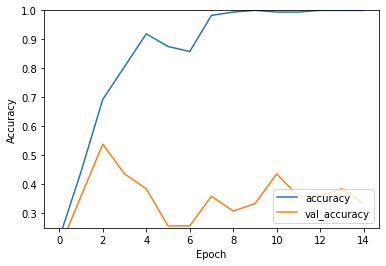

In [43]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.25, 1])
plt.legend(loc='lower right')

data aug

In [33]:
import tensorflow as tf

In [34]:
dataGen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1./255,
    rotation_range =5,
    horizontal_flip =True,
    vertical_flip =True,)

In [35]:
train_dataset_aug = dataGen.flow_from_directory(
    training_path,
    target_size = (200,200),
    batch_size = 32,
    shuffle = True,
    seed = 865)

Found 345 images belonging to 5 classes.


In [36]:
test_dataset_aug = dataGen.flow_from_directory(
    test_path,
    target_size = (200,200),
    batch_size = 32,
    shuffle=True,
    seed = 865)

Found 39 images belonging to 5 classes.


In [37]:
CNNmodel_aug = tf.keras.models.Sequential()

CNNmodel_aug.add(tf.keras.layers.Conv2D(32, (3,3), activation ='relu', input_shape=(200,200,3)))
CNNmodel_aug.add(tf.keras.layers.MaxPooling2D((2,2)))
CNNmodel_aug.add(tf.keras.layers.Conv2D(64, (3,3), activation ='relu'))
CNNmodel_aug.add(tf.keras.layers.MaxPooling2D((2,2)))
CNNmodel_aug.add(tf.keras.layers.Conv2D(64,(3,3), activation ='relu'))

CNNmodel_aug.add(tf.keras.layers.Flatten())
CNNmodel_aug.add(tf.keras.layers.Dense(32, activation ='relu'))
CNNmodel_aug.add(tf.keras.layers.Dense(64, activation ='relu'))
CNNmodel_aug.add(tf.keras.layers.Dense(5, activation ='softmax'))

CNNmodel_aug.compile(optimizer = 'adam',
                loss='categorical_crossentropy',metrics = ['accuracy'])

In [38]:
history_2 = CNNmodel_aug.fit(train_dataset_aug, validation_data=test_dataset_aug, epochs = 15)

Epoch 1/15
11/11 [==============================] - 5s 461ms/step - loss: 1.6974 - accuracy: 0.2306 - val_loss: 1.3886 - val_accuracy: 0.4872
Epoch 2/15
11/11 [==============================] - 5s 415ms/step - loss: 1.2866 - accuracy: 0.4269 - val_loss: 1.1683 - val_accuracy: 0.5128
Epoch 3/15
11/11 [==============================] - 5s 420ms/step - loss: 1.1385 - accuracy: 0.5143 - val_loss: 0.9618 - val_accuracy: 0.5641
Epoch 4/15
11/11 [==============================] - 5s 426ms/step - loss: 0.8459 - accuracy: 0.6608 - val_loss: 1.1040 - val_accuracy: 0.5128
Epoch 5/15
11/11 [==============================] - 5s 416ms/step - loss: 0.7732 - accuracy: 0.6986 - val_loss: 1.1820 - val_accuracy: 0.4359
Epoch 6/15
11/11 [==============================] - 5s 415ms/step - loss: 0.7474 - accuracy: 0.7335 - val_loss: 0.8002 - val_accuracy: 0.7179
Epoch 7/15
11/11 [==============================] - 5s 425ms/step - loss: 0.7469 - accuracy: 0.7133 - val_loss: 1.1389 - val_accuracy: 0.5385
Epoch 

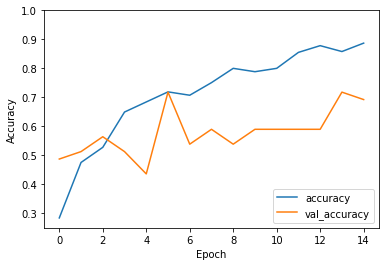

In [41]:
plt.plot(history_2.history['accuracy'], label='accuracy')
plt.plot(history_2.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.25, 1])
plt.legend(loc='lower right')